In [23]:
# Imports
import os
import requests
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
import hvplot.pandas
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import quantstats as qs
%matplotlib inline

In [24]:
# Load .env enviroment variables
load_dotenv()

True

In [25]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [26]:
# Pulling Crypto Information and store in datframe
# Format current date as ISO format
today = pd.Timestamp("2021-1-1", tz="America/New_York").isoformat()

# Set the tickers BTCUSD (bitcoin), ETHUSD (Ethereum), and TRXUSD (Tron)
tickers = ["BTCUSD", "ETHUSD","TRXUSD"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for crypto

df_crypto = alpaca.get_crypto_bars(
    tickers,
    timeframe,
    start = today
).df


In [27]:
# Reorganize the crypto DataFrame
# Separate ticker data
BTC = df_crypto[df_crypto['symbol']=='BTCUSD'].drop('symbol', axis=1)
BTC['BTC Return'] = BTC['close'].pct_change()
ETH = df_crypto[df_crypto['symbol']=='ETHUSD'].drop('symbol', axis=1)
ETH['ETH Return'] = ETH['close'].pct_change()
TRX = df_crypto[df_crypto['symbol']=='TRXUSD'].drop('symbol', axis=1)
TRX['TRX Return'] = TRX['close'].pct_change()

# Concatenate the ticker DataFrames
df_crypto = pd.concat([BTC, ETH, TRX],axis=1, keys=['BTC','ETH', 'TRX']).dropna()

df_crypto.head()

BTC                                          \
                          exchange      open      high       low     close   
timestamp                                                                    
2021-01-26 06:00:00+00:00     CBSE  32510.82  32584.62  31420.69  31551.72   
2021-01-26 06:00:00+00:00     FTXU  31936.00  32830.00  30900.00  31526.00   
2021-01-27 06:00:00+00:00     CBSE  31556.28  31936.16  29200.00  30407.13   
2021-01-27 06:00:00+00:00     FTXU  31606.00  31719.00  29275.00  31622.00   
2021-01-28 06:00:00+00:00     CBSE  33487.92  34433.04  32729.00  33052.81   

                                                                             \
                                volume trade_count          vwap BTC Return   
timestamp                                                                     
2021-01-26 06:00:00+00:00   4995.55601       56671  31996.651684  -0.022773   
2021-01-26 06:00:00+00:00    455.97410         483  31636.023453  -0.000815   
2021-01-27 06:00:00+00:00  38417.93193      298822  30656.520271  -0.035490   
2021-01-27 06:00:00+00:00   2268.03930         784  30676.961052   0.039953   
2021-01-28 06:00:00+00:00  16333.57023      143680  33787.707047   0.045247   

                               ETH  ...                 TRX            \
                          exchange  ... ETH Return exchange      open   
timestamp                           ...                                 
2021-01-26 06:00:00+00:00     CBSE  ...  -0.041474     FTXU  0.029550   
2021-01-26 06:00:00+00:00     FTXU  ...  -0.003227     FTXU  0.029550   
2021-01-27 06:00:00+00:00     CBSE  ...  -0.032012     FTXU  0.028385   
2021-01-27 06:00:00+00:00     FTXU  ...   0.050961     FTXU  0.028385   
2021-01-28 06:00:00+00:00     CBSE  ...   0.000905     FTXU  0.029725   

                                                                               \
                               high       low     close    volume trade_count   
timestamp                                                                       
2021-01-26 06:00:00+00:00  0.029550  0.028700  0.028700  641654.0         8.0   
2021-01-26 06:00:00+00:00  0.029550  0.028700  0.028700  641654.0         8.0   
2021-01-27 06:00:00+00:00  0.028735  0.028385  0.028735   36045.0         2.0   
2021-01-27 06:00:00+00:00  0.028735  0.028385  0.028735   36045.0         2.0   
2021-01-28 06:00:00+00:00  0.030818  0.029510  0.030818  714424.0         6.0   

                                                
                               vwap TRX Return  
timestamp                                       
2021-01-26 06:00:00+00:00  0.029282  -0.030815  
2021-01-26 06:00:00+00:00  0.029282  -0.030815  
2021-01-27 06:00:00+00:00  0.028385   0.001220  
2021-01-27 06:00:00+00:00  0.028385   0.001220  
2021-01-28 06:00:00+00:00  0.030340   0.072473  

[5 rows x 27 columns]

In [28]:
# Pulling Stock Information and store in datframe
# Format current date as ISO format
today = pd.Timestamp("2021-1-24", tz="America/New_York").isoformat()

# Set the stock_tickers to TSLA , GME, and SPY
stock_tickers = ["TSLA", "GME","SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and GOOGL
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock = alpaca.get_bars(
    stock_tickers,
    timeframe,
    start = today
).df

In [29]:
# Reorganize the stocd DataFrame
# Separate ticker data
TSLA = df_stock[df_stock['symbol']=='TSLA'].drop('symbol', axis=1)
TSLA['TSLA Return'] = TSLA['close'].pct_change().dropna()

GME = df_stock [df_stock['symbol']=='GME'].drop('symbol', axis=1)
GME['GME Return'] = GME['close'].pct_change().dropna()

SPY = df_stock [df_stock['symbol']=='SPY'].drop('symbol', axis=1)
SPY['SPY Return'] = SPY['close'].pct_change().dropna()


# Concatenate the ticker DataFrames
df_stock = pd.concat([TSLA, GME, SPY],axis=1, keys=['TSLA','GME', 'SPY']).dropna()
df_stock.head()

TSLA                                      \
                               open    high       low   close    volume   
timestamp                                                                 
2021-01-26 05:00:00+00:00  891.3800  895.90  871.6000  883.09  23239798   
2021-01-27 05:00:00+00:00  870.3500  891.50  858.6600  864.16  27333955   
2021-01-28 05:00:00+00:00  820.0000  848.00  801.0000  835.43  26383788   
2021-01-29 05:00:00+00:00  830.0003  842.41  780.1000  793.53  35010399   
2021-02-01 05:00:00+00:00  814.2900  842.00  795.5601  839.81  25419892   

                                                                  GME          \
                          trade_count        vwap TSLA Return    open    high   
timestamp                                                                       
2021-01-26 05:00:00+00:00      607303  885.846193    0.002600   88.56  150.00   
2021-01-27 05:00:00+00:00      896055  868.936011   -0.021436  354.83  380.00   
2021-01-28 05:00:00+00:00      935864  831.341042   -0.033246  265.00  483.00   
2021-01-29 05:00:00+00:00     1315023  805.064642   -0.050154  379.71  413.98   
2021-02-01 05:00:00+00:00      817448  823.420381    0.058322  316.56  322.00   

                           ...                            SPY          \
                           ...        vwap GME Return    open    high   
timestamp                  ...                                          
2021-01-26 05:00:00+00:00  ...  122.872824   0.927074  385.41  385.85   
2021-01-27 05:00:00+00:00  ...  316.219003   1.348358  380.22  380.32   
2021-01-28 05:00:00+00:00  ...  290.999661  -0.442894  376.36  381.93   
2021-01-29 05:00:00+00:00  ...  323.206642   0.678719  375.63  376.67   
2021-02-01 05:00:00+00:00  ...  252.238760  -0.307692  373.72  377.34   

                                                                               \
                               low   close     volume trade_count        vwap   
timestamp                                                                       
2021-01-26 05:00:00+00:00  383.540  383.75   42665281      272405  384.407436   
2021-01-27 05:00:00+00:00  372.010  374.65  123351578      712258  376.573606   
2021-01-28 05:00:00+00:00  375.890  377.52   94198104      509965  378.416391   
2021-01-29 05:00:00+00:00  368.270  370.14  126760121      730087  372.205316   
2021-02-01 05:00:00+00:00  370.376  376.02   75817597      414900  374.490318   

                                      
                          SPY Return  
timestamp                             
2021-01-26 05:00:00+00:00  -0.002054  
2021-01-27 05:00:00+00:00  -0.023713  
2021-01-28 05:00:00+00:00   0.007660  
2021-01-29 05:00:00+00:00  -0.019549  
2021-02-01 05:00:00+00:00   0.015886  

[5 rows x 24 columns]

In [30]:
#Combine crypto and stock returns
df_crypto_return =  pd.concat([df_crypto['BTC']['BTC Return'], df_crypto['ETH']['ETH Return'],df_crypto['TRX']['TRX Return']], axis=1)
df_stock_return = pd.concat([df_stock['TSLA']['TSLA Return'], df_stock['GME']['GME Return'], df_stock['SPY']['SPY Return']], axis =1)


# Can we outperform the S&P 500 with our strategy of utilizing more volatile assets?

First, we prove the assets we are buying are more volatile than the S&P 500:

In [31]:
#calculate STDs
all_stds = df_crypto_return.std()
stock_stds = df_stock_return.std()
all_stds = pd.concat([all_stds, stock_stds], axis=0)
all_stds.hvplot.bar(legend = False, title = "STDs")



:Bars   [index]   (0)

In [32]:
#Volatity
volatility = all_stds * np.sqrt(365)
volatility.hvplot.line(title = "Volatility")

:Curve   [index]   (0)

All of the assets in our portfolio have a higher standard deviation and volatility than the S&P 500

Now that we have proven our assets are indeed fitting of the self-imposed requirements, we can focus on how our volatile assets compare to the SPY.

In [33]:
#Plot box chart
c = df_crypto_return.hvplot.box( title = "Daily Return Box", legend = False)
s = df_stock_return.hvplot.box(legend = False)
c*s 

:Overlay
   .BoxWhisker.I  :BoxWhisker   [Variable]   (value)
   .BoxWhisker.II :BoxWhisker   [Variable]   (value)

As seen in the Daily Return Box plot, all of our assets have greater ranges than the S&P 500 to both the upside and downside. We should be able to outperform S&P 500 based on this chart so long as markets are expanding and not contracting. 

# How would our strategy have done in the past year?


In [34]:

#Calculate cumulative returns for crypto and stocks
df_cumulative_returns = (1 + df_crypto_return).cumprod()
df_cumulative_stock_returns = (1 + df_stock_return).cumprod()


# Plot the chart
c = df_cumulative_returns.hvplot(title = "Cumulative Returns")
s = df_cumulative_stock_returns.hvplot()
c*s 

:Overlay
   .NdOverlay.I  :NdOverlay   [Variable]
      :Curve   [timestamp]   (value)
   .NdOverlay.II :NdOverlay   [Variable]
      :Curve   [timestamp]   (value)

In [35]:
# Calculate the Sharpe ratios
sharpe_crypto_ratios = (df_crypto_return.mean() * 365) / (df_crypto_return.std() * np.sqrt(365))
sharpe_stock_ratios = (df_stock_return.mean() * 252) / (df_stock_return.std() * np.sqrt(252))


# Plot Sharpe ratios for crypto and stocks
c = sharpe_crypto_ratios.hvplot.bar(title = "Sharpe Ratios", hover_fill_color="orange", legend = False)
s = sharpe_stock_ratios.hvplot.bar(hover_color= "orange", legend= False)
c*s

:Overlay
   .Bars.A_0.I  :Bars   [index]   (0)
   .Bars.A_0.II :Bars   [index]   (0)

Re: Our strategy would not have done as well as we would have hoped after backtesting over a year's worth of data. As you can see from our chart, one out of the four assets we held had greater cumulative returns than the S&P 500. $TRX, Tron cryptocurrency coin, was a massive outlier in our findings, as it was the only asset to outperform the S&P 500, thus the other assets, and by a large margin. On Apirl 16, 2021, $TRX was outperforming SPY by 96.6%. The risk-reward indicator or sharpe ratio's demonstrate to us that even though our assets have not been performing the best, they are still good bets. Three out of our five assets have higher sharpe ratios than the SPY. Sharpe ratios is a great indicator to determine whether an asset's volatility is worth it or not.

# Is it always better to buy higher volatility assets? 

In [36]:
# Drawdown chart

# Trailing 252 trading day window
window = 252

# Calculate the max drawdown in the past window days for each day in the series.
# Use min_periods=1 if you want to let the first 252 days data have an expanding window
roll_max = df_crypto['TRX']['close'].rolling(window, min_periods=1).max()
daily_drawdown = df_crypto['TRX']['close']/roll_max - 1.0

# Next we calculate the minimum (negative) daily drawdown in that window.
# Again, use min_periods=1 if you want to allow the expanding window
max_daily_drawdown = daily_drawdown.rolling(window, min_periods=1).min()

# Plot the results
d = daily_drawdown.hvplot(legend = False, hover_color = "yellow")
md = max_daily_drawdown.hvplot(title = "TRX Max Daily Drawdown", legend= False, hover_color = "green")

#overlay both daily drawdown and max daily drawdown
l = d*md

In [37]:
# Drawdown chart

# Trailing 252 trading day window
window = 252

# Calculate the max drawdown in the past window days for each day in the series.
# Use min_periods=1 if you want to let the first 252 days data have an expanding window
roll_max = df_stock['SPY']['close'].rolling(window, min_periods=1).max()
daily_drawdown = df_stock['SPY']['close']/roll_max - 1.0

# Next we calculate the minimum (negative) daily drawdown in that window.
# Again, use min_periods=1 if you want to allow the expanding window
max_daily_drawdown = daily_drawdown.rolling(window, min_periods=1).min()

# Plot the results
wr = daily_drawdown.hvplot(legend = False, hover_color = "yellow")
rb = max_daily_drawdown.hvplot(title = "SPY Max Daily Drawdown", legend= False, hover_color = "green")

#overlay both daily drawdown and max daily drawdown
w = wr*rb

In [38]:
w + l

:Layout
   .Overlay.Close.I  :Overlay
      .Curve.Close.I  :Curve   [timestamp]   (close)
      .Curve.Close.II :Curve   [timestamp]   (close)
   .Overlay.Close.II :Overlay
      .Curve.Close.I  :Curve   [timestamp]   (close)
      .Curve.Close.II :Curve   [timestamp]   (close)

According to our findings, it is not always better to buy the more volatile assets. When we sample data from the past year, we can see that volatile assets have greater exposure to the down side than the S&P500. In the past year, many economists would classify risk-on assets as being in a bear market. One could conclude that when markets are in turmoil, assets that can move more quickly will move more quickly to the down side than less volatile assets. This is due to the available liqudity. The S&P500 is one of the most traded and widely available assets in the world while TRX is not well-known and only available certain places. This leads to S&P500 having a lot of trust and TRX not so much, people with lots of money feel comfortable putting large sums of money into very trusty and very liquid assets. Since S&P500 has more liquidity than TRX, it takes billions of more dollars to push the price down 60% in a day where TRX it could only be millions of dollars. You have some of the largest banks like Vanguard and BlackRock offering S&P500 versus cryptic internet addresses offering TRX through decentralized exchanges. 

In [39]:
# Creating ChartBTC_qsom a quantstats library
# From library extend pandas functionality with metrics, etc.
qs.extend_pandas()

In [40]:
# fetch the daily returns for a stock
BTC_qs = qs.utils.download_returns('BTC-USD', period="1Y")
TSLA_qs = qs.utils.download_returns('TSLA', period="1Y")
GME_qs = qs.utils.download_returns('GME', period="1Y")
ETH_qs = qs.utils.download_returns('ETH-USD', period="1Y")
TRX_qs = qs.utils.download_returns('TRX-USD', period="1Y")
SPY_qs = qs.utils.download_returns('SPY', period="1Y")

In [41]:
BTC_df = pd.DataFrame(BTC_qs).dropna()
BTC_df.columns=["BTC"]
ETH_df = pd.DataFrame(ETH_qs).dropna()
ETH_df.columns=["ETH"]
GME_df = pd.DataFrame(GME_qs).dropna()
GME_df.columns=["GME"]
TSLA_df = pd.DataFrame(TSLA_qs).dropna()
TSLA_df.columns=["TSLA"]
TRX_df = pd.DataFrame(TRX_qs).dropna()
TRX_df.columns=["TRX"]

In [42]:
all_df = pd.concat([BTC_df, TSLA_df, GME_df, ETH_df, TRX_df], axis=1)
all_df.head()

,BTC,TSLA,GME,ETH,TRX
Date,,,,,
2021-11-21 00:00:00+00:00,-0.016194,NaN,NaN,-0.031791,0.016782
2021-11-22 00:00:00+00:00,-0.041566,NaN,NaN,-0.042456,-0.047344
2021-11-22 05:00:00+00:00,NaN,0.017422,0.081949,NaN,NaN
2021-11-23 00:00:00+00:00,0.022736,NaN,NaN,0.061712,0.009920
2021-11-23 05:00:00+00:00,NaN,-0.041353,-0.135932,NaN,NaN


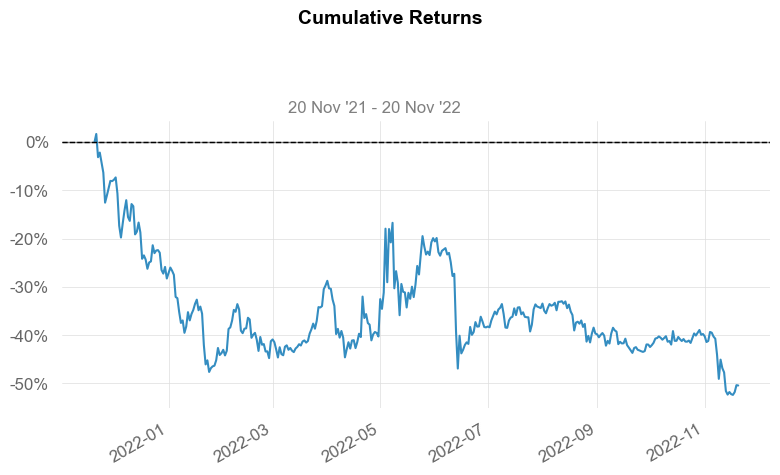

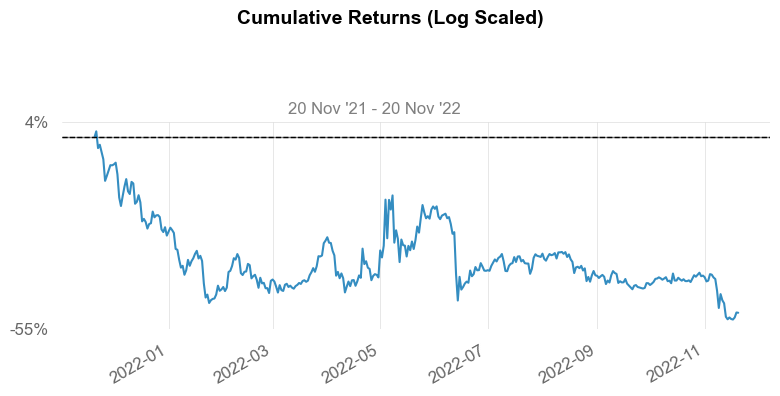

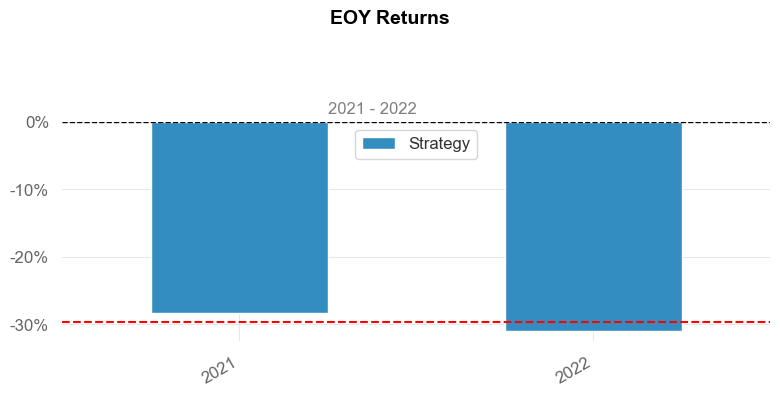

c:\Users\Max Work\anaconda3\envs\alpacaenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


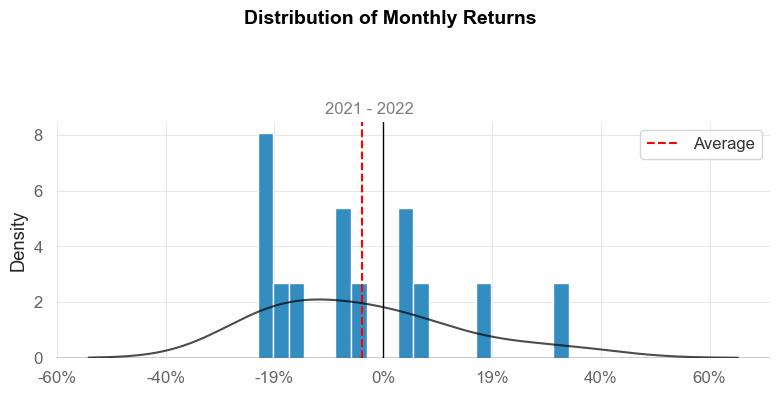

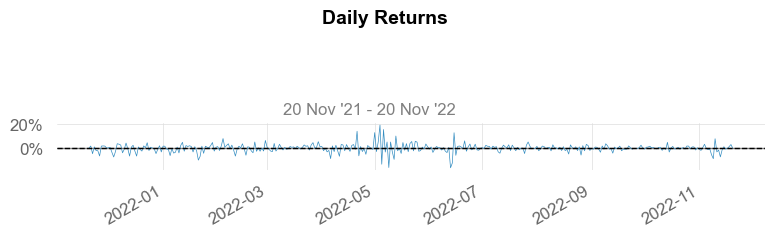

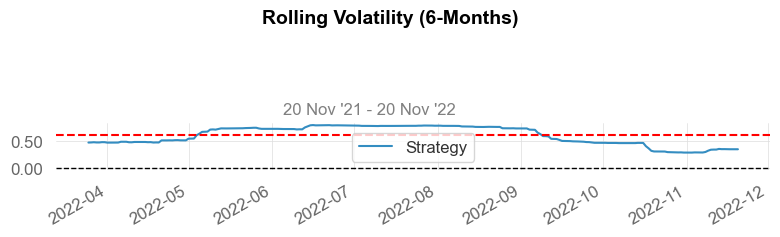

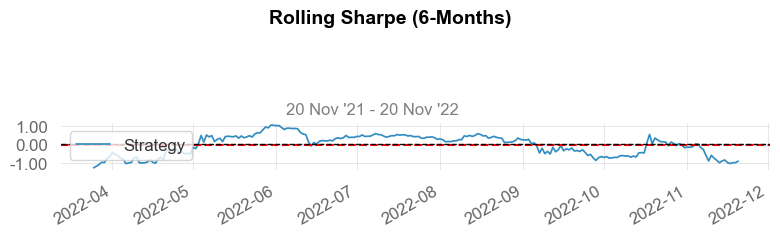

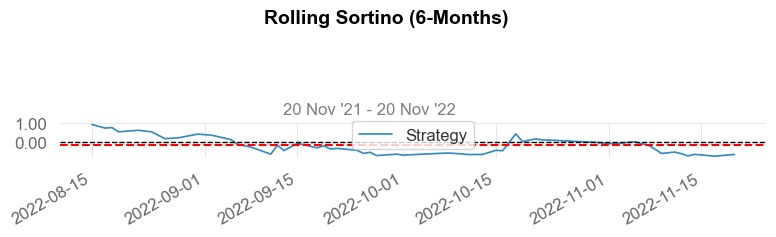

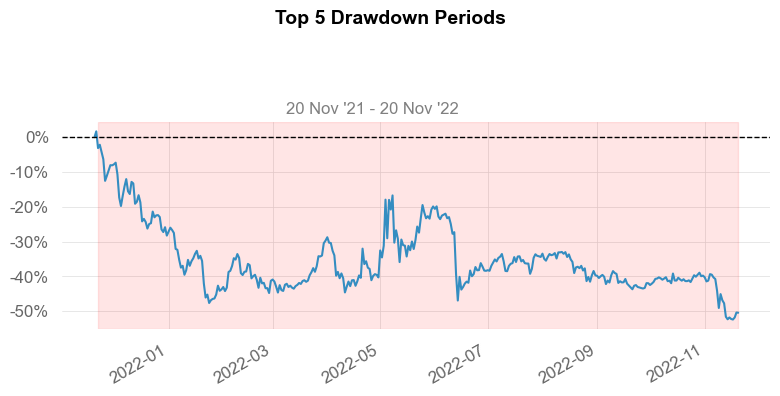

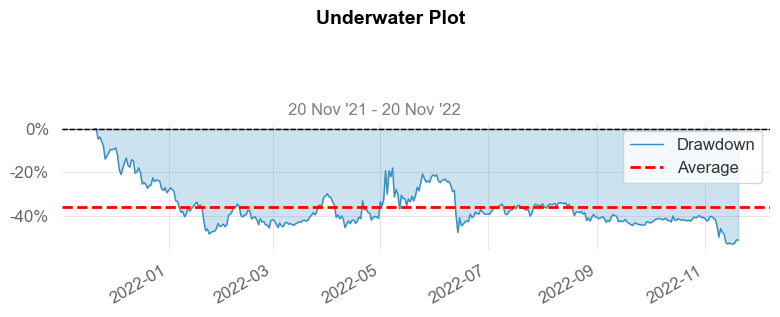

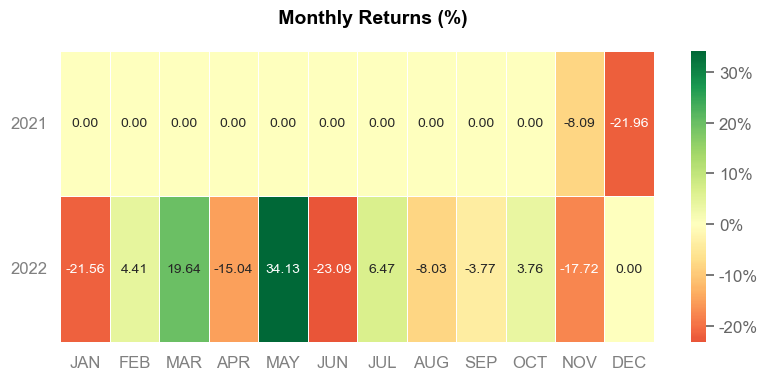

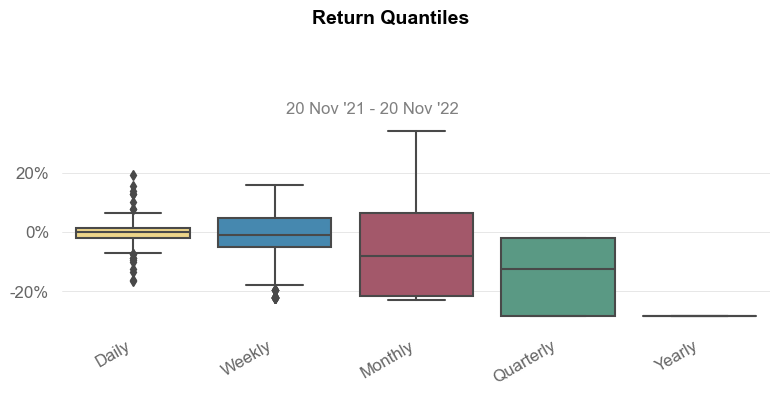

In [45]:
qs.reports.plots(TRX_qs, mode='full')

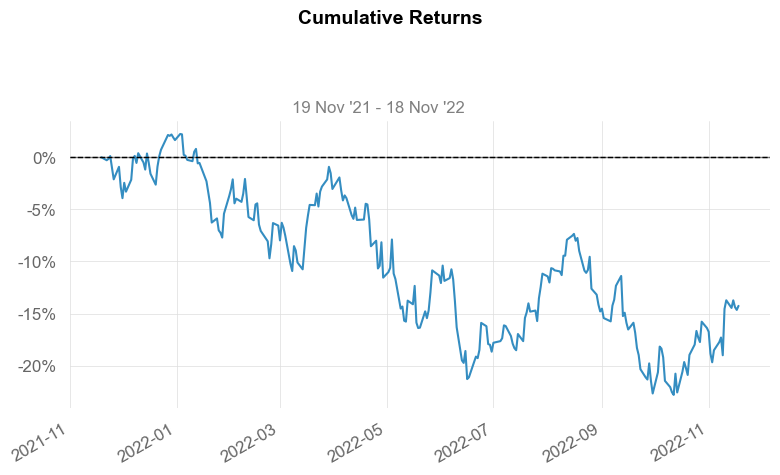

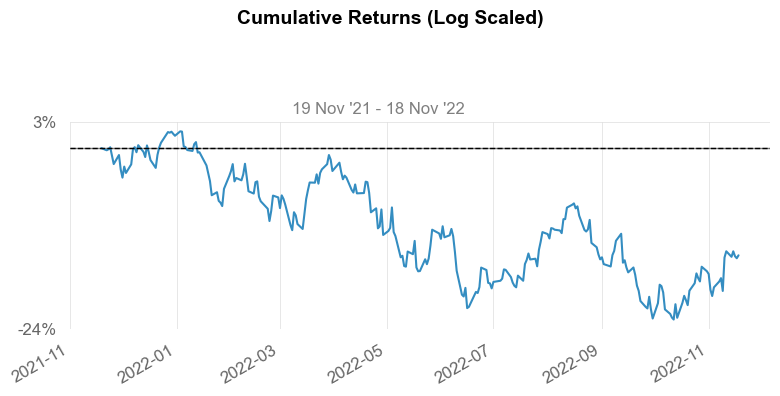

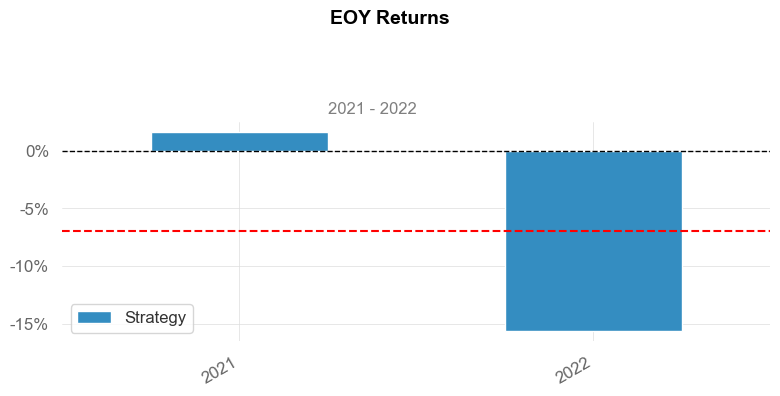

c:\Users\Max Work\anaconda3\envs\alpacaenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


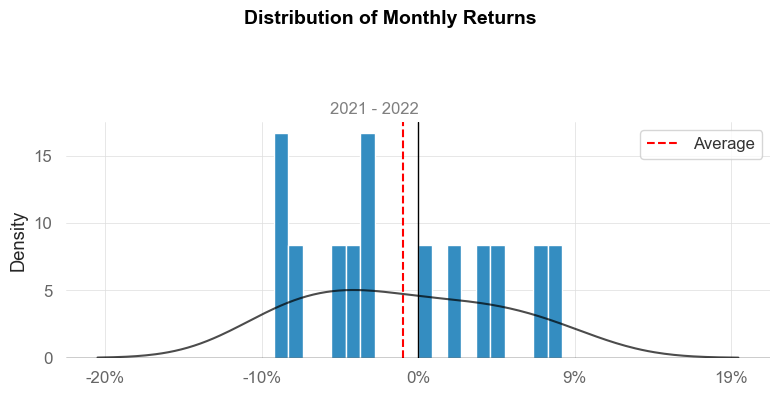

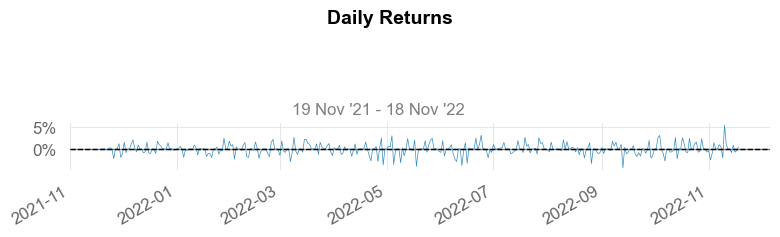

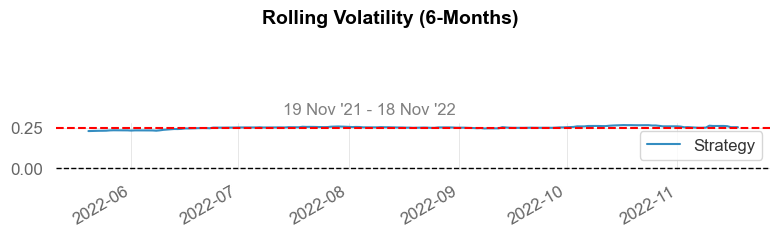

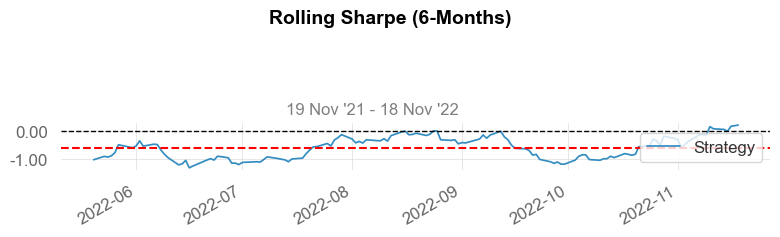

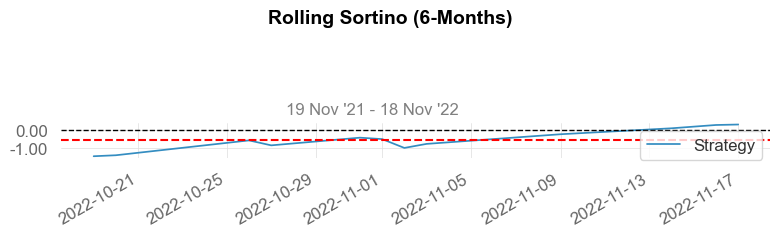

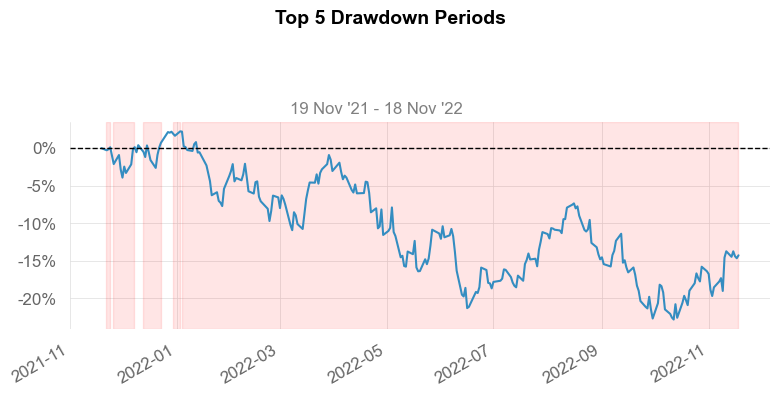

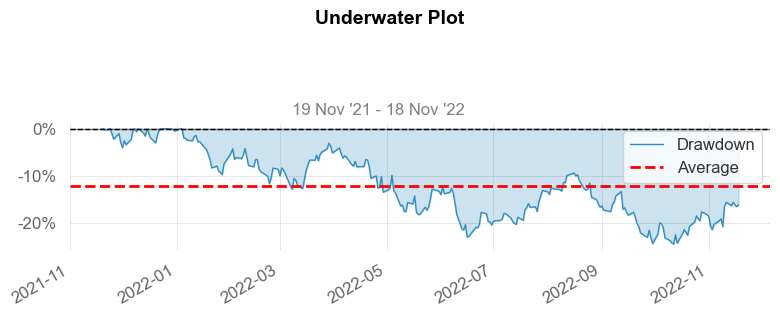

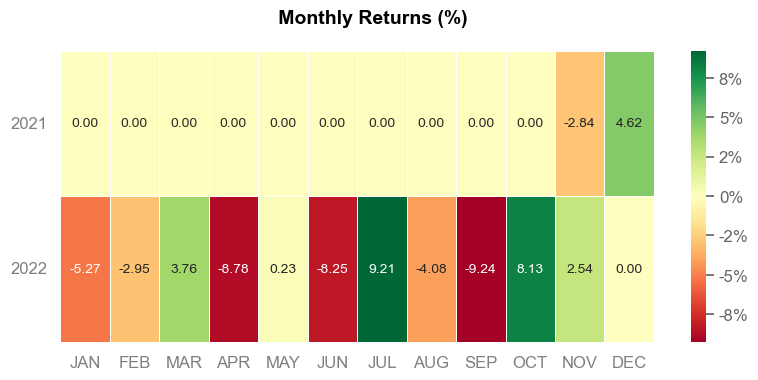

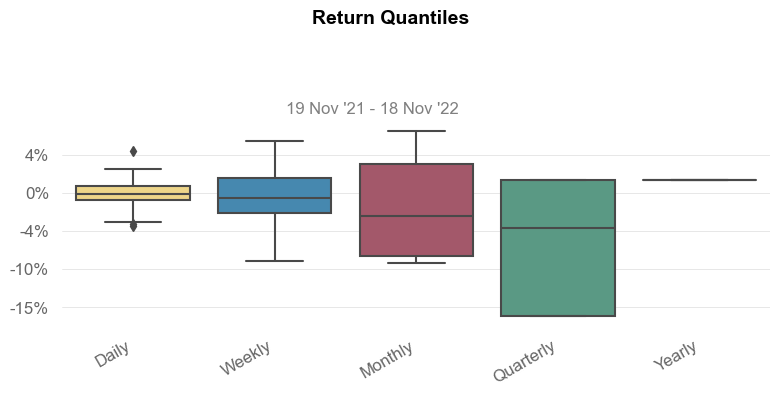

In [44]:
qs.reports.plots(SPY_qs, mode='full')